In [48]:
import geopandas as gpd
from pathlib import Path
file = Path(r"G:\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\200 Technical\202 General\KMZs\2023-0620 Frick Unit Pipeline Aligment.kmz")
file = Path(r"G:\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\200 Technical\202 General\KMZs\Frick Unit Pipeline - For Denver .kmz")
import zipfile
# Open the KMZ file
# for file in P.glob("*.kmz"):
zipdata = zipfile.ZipFile(file)
zipinfos = zipdata.infolist()

# iterate through each file
for zipinfo in zipinfos:
	# zipinfo.filename = str(P.joinpath(f"{file.stem}.kml"))
	# zipinfo.filename = f"{file.stem}.kml"
	zipinfo.filename = f"pipelines.kml"
	print(zipinfo.filename)
	folder = Path("data").joinpath("kml")
	folder.mkdir(exist_ok=True)
	zipdata.extract(zipinfo,path=folder)

pipelines.kml


In [49]:
import pandas as pd
import fiona

file = folder.joinpath("pipelines.kml")
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gdf = gpd.GeoDataFrame(pd.concat(
	[ gpd.read_file(
        file,
        driver='KML',
        layer=layer,
        crs='EPSG:26945'
        ) for layer in fiona.listlayers(file)],
    ignore_index=True,),
    )
print(gdf.crs)
# gdf = gpd.read_file(file, driver="KML")
gdf.head(2)

EPSG:4326


,Name,Description,geometry
0,"N0 - 42""",,MULTILINESTRING Z ((-118.88092 35.32602 0.0000...
1,"N0 - 30""",,MULTILINESTRING Z ((-118.88745 35.31099 0.0000...


(8, 3)
EPSG:4326


<Axes: >

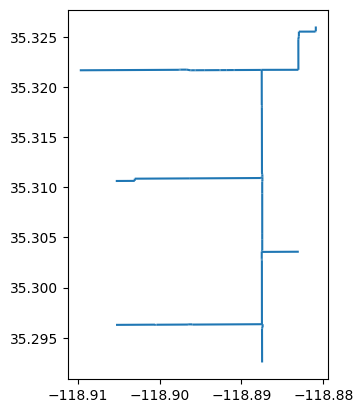

In [51]:
print(gdf.shape)
print(gdf.crs)
gdf.plot()

In [52]:
gdf['label'] = gdf['Name']#.str.split(" ",expand=True)[0]

In [55]:
# gdf

In [58]:
data_path = Path("data")
gdf.to_parquet(data_path.joinpath("pipes.parquet"))
# data_path = Path("data\\shps")
# gdf.to_file(data_path.joinpath("pipeline_from_kmz_2023-07-17.shp"))


In [57]:
# gpd.read_parquet(data_path.joinpath("pipes.parquet")).head(2)